In [ ]:
!nvidia-smi

Mon Aug  8 19:14:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch 

if torch.cuda.is_available():
    device = torch.device('cuda')
    
    print('there are %d GPU(s) available.' % torch.cuda.device_count())
    
    print('we will use the GPU: ', torch.cuda.get_device_name(0))
    
else:
    print("No GPU available, using the GPU instead")
    device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b2669afae636154cd698f94e2f1ef71dd6d2c2f455d3240e57ef8cd727ca5684
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
#import re
import numpy as np
import pandas as pd
from pprint import pprint
from nltk import sent_tokenize, word_tokenize
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, LdaMulticore
# spacy for lemmatization
import spacy
from gensim import corpora, models

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
from tqdm import tqdm_notebook as tqdm
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
import re
import nltk
import string 
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
dat=pd.read_csv("gdrive/My Drive/Colab Notebooks/datawattpad2.csv")
print(dat)

            Date                                               Data  score  \
0     2020-09-16  Wattpad sudah bagus banget, tapi kok makin di ...      5   
1     2020-09-16  Dari dulu jaman SD sampai SMP suka banget sama...      1   
2     2020-09-16  saya mau protes, saya mau login ke akun wattpa...      1   
3     2020-09-16  Wattpad skrng enggak kayak wattpad dulu. Saya ...      1   
4     2020-09-16  Maaf ka.sebelumnya, klo menurut saya bagus yg ...      2   
...          ...                                                ...    ...   
7942  2021-03-14  Suka banget sama wattpad👍, tapi ini di hp lagi...      5   
7943  2021-03-14           Klo boleh jjur kecewa sma wp yg sekarang      2   
7944  2021-03-14  Saya s mencoba app ini di googledan hasilnya b...      3   
7945  2021-03-14  Login susah ribet ,banyak batasan baca cerita ...      3   
7946  2021-03-14  Aplikasi ini sangat bagus!!!!!!!!!!!!!!!!!!!!!...      5   

                                           Data_Cleaned      as

In [ ]:
dat.to_csv('dat.csv')
dat.head()

,Date,Data,score,Data_Cleaned,aspek,kelas
0,2020-09-16,"Wattpad sudah bagus banget, tapi kok makin di ...",5,bagus perbarui puas bagi kutip cerita tidak bi...,pelayanan,2
1,2020-09-16,Dari dulu jaman SD sampai SMP suka banget sama...,1,suka cerita enak fitur baca luas baca cerita m...,pelayanan,0
2,2020-09-16,"saya mau protes, saya mau login ke akun wattpa...",1,protes masuk akun masuk sandi reset akun perba...,tampilan,0
3,2020-09-16,Wattpad skrng enggak kayak wattpad dulu. Saya ...,1,sekarang kecewa baca luar jaringan cerita sisa...,sistem,0
4,2020-09-16,"Maaf ka.sebelumnya, klo menurut saya bagus yg ...",2,bagus baca puas tidak batas sekarang sedih hib...,sistem,0


In [ ]:
dat

,Date,Data,score,Data_Cleaned,aspek,kelas
0,2020-09-16,"Wattpad sudah bagus banget, tapi kok makin di ...",5,bagus perbarui puas bagi kutip cerita tidak bi...,pelayanan,2
1,2020-09-16,Dari dulu jaman SD sampai SMP suka banget sama...,1,suka cerita enak fitur baca luas baca cerita m...,pelayanan,0
2,2020-09-16,"saya mau protes, saya mau login ke akun wattpa...",1,protes masuk akun masuk sandi reset akun perba...,tampilan,0
3,2020-09-16,Wattpad skrng enggak kayak wattpad dulu. Saya ...,1,sekarang kecewa baca luar jaringan cerita sisa...,sistem,0
4,2020-09-16,"Maaf ka.sebelumnya, klo menurut saya bagus yg ...",2,bagus baca puas tidak batas sekarang sedih hib...,sistem,0
...,...,...,...,...,...,...
7942,2021-03-14,"Suka banget sama wattpad👍, tapi ini di hp lagi...",5,suka telfon genggam tidak bisa buka unduh ulang,tampilan,2
7943,2021-03-14,Klo boleh jjur kecewa sma wp yg sekarang,2,jujur kecewa baru,tampilan,0
7944,2021-03-14,Saya s mencoba app ini di googledan hasilnya b...,3,aplikasi google hasil bagus coba unduh bagus b...,pelayanan,1
7945,2021-03-14,"Login susah ribet ,banyak batasan baca cerita ...",3,masuk susah ribet batas baca cerita luar jarin...,sistem,1


In [ ]:
dat['Data_Cleaned']=dat['Data_Cleaned'].apply(str)

In [ ]:
data = []
data = dat['Data_Cleaned'].values.tolist()
data

['bagus perbarui puas bagi kutip cerita tidak bisa langsung gambar bagi suka bagi cerita',
 'suka cerita enak fitur baca luas baca cerita malas baca ganti suka',
 'protes masuk akun masuk sandi reset akun perbarui susah',
 'sekarang kecewa baca luar jaringan cerita sisa dalam jaringan iklan slide cerita seru bayar keluar uang kouta tempat beli koin baca baca enak',
 'bagus baca puas tidak batas sekarang sedih hibur bosan murah luar jaringan bintang',
 'tulis baca enak versi lama iklan pasang pakai koin baca cerita tata letak enak pindah tempat enak lama turunin bintang eror',
 ' asik bab selajutnya iklan iklan iklan lama hilang perasaan iklan lama malas sekarang',
 'lama enak perbarui premium unduh ubah boros kuota sekarang pandemi',
 'versi batas cerita luar jaringan efektif bayar sekolah langgan',
 'zaman penulis cerita luar jaringan iklan banding paksa premium tulis gratis bayar',
 'versi lama tidak bagus orang tidak pindah tempat aplikasi baca bagus bagus',
 'perbarui tidak bagus t

##LDA

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
sw_indo = stopwords.words("indonesian") + list(punctuation)

In [ ]:
bow = CountVectorizer(ngram_range=(1,2), tokenizer=word_tokenize, stop_words=sw_indo, min_df=5)

In [ ]:
bow_matrix = bow.fit_transform(dat.Data_Cleaned)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
vocab = bow.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, random_state=42)

In [ ]:
lda_matrix = lda.fit_transform(bow_matrix)

In [ ]:
def get_topic(model):
  return[[vocab[idx] for idx in reversed(comp.argsort()[-6:]) if vocab[idx].isalnum()]
         for comp in model.components_]

In [ ]:
get_topic(lda)

[['jaringan', 'baca', 'cerita', 'batas'],
 ['unduh', 'perbarui', 'kecewa', 'bagus', 'bayar', 'pilih'],
 ['suka', 'baca', 'novel', 'bagus', 'cerita'],
 ['bagus', 'jelek', 'fitur', 'halusinasi', 'lambat', 'bintang'],
 ['versi', 'kecewa', 'suka', 'balikin', 'jujur'],
 ['cerita', 'bagus', 'hilang', 'baca', 'seru', 'tulis'],
 ['baca', 'tulis', 'komentar', 'cerita', 'senang', 'orang'],
 ['aplikasi', 'bagus', 'cerita', 'unduh', 'baca'],
 ['iklan', 'baca', 'enak', 'ganggu', 'bab'],
 ['masuk', 'akun', 'email', 'hapus', 'coba', 'sandi']]

In [ ]:
token = []  
for i in data: 
    token.append(word_tokenize(i))

In [ ]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).


bigram = Phrases(token, min_count=5)
trigram = Phrases(bigram[token])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
#Create a Dictionary

token_postag = make_bigrams(token)

dictionary = Dictionary(token_postag)

In [ ]:
#Vektorisasi Data (Create Corpus)

corpus = [dictionary.doc2bow(text) for text in token_postag]
print('Jumlah kata Unik: %d' % len(dictionary))

Jumlah kata Unik: 4301


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, step, start):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
%%time

import warnings
warnings.simplefilter("ignore", UserWarning)

start, step, limit = 1, 1, 21
coherence_val, kCV = [], 10

for i in range(kCV):
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=token_postag, limit=limit,
                                                       step = step, start = start)
    coherence_val.append(coherence_values)

coherence_w = np.mean(np.array(coherence_val),axis = 0)

CPU times: user 10min 46s, sys: 25.4 s, total: 11min 11s
Wall time: 10min 44s


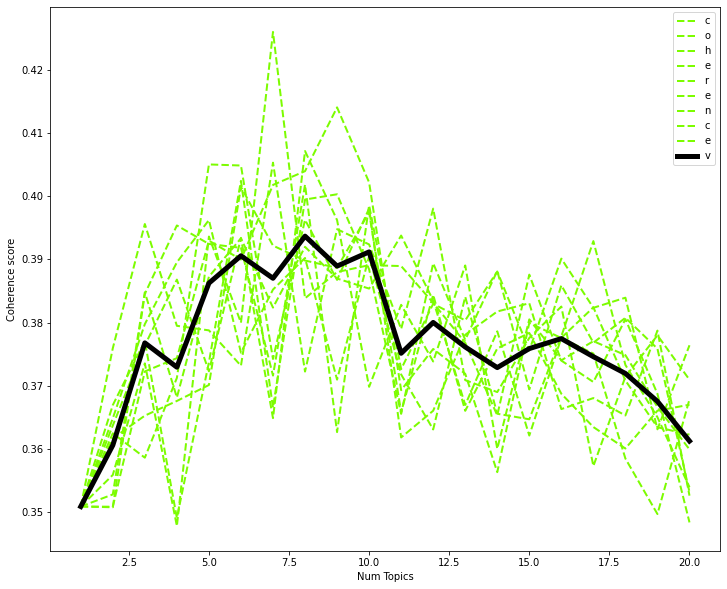

In [ ]:
# Show graph

x = range(start, limit, step)

plt.figure(figsize=(12,10))

for c in coherence_val:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_w, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
for m, cv in zip(x, coherence_w):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.350916
Num Topics = 2  has Coherence Value of 0.360609
Num Topics = 3  has Coherence Value of 0.376787
Num Topics = 4  has Coherence Value of 0.372947
Num Topics = 5  has Coherence Value of 0.386237
Num Topics = 6  has Coherence Value of 0.390559
Num Topics = 7  has Coherence Value of 0.387006
Num Topics = 8  has Coherence Value of 0.393664
Num Topics = 9  has Coherence Value of 0.38893
Num Topics = 10  has Coherence Value of 0.391175
Num Topics = 11  has Coherence Value of 0.375148
Num Topics = 12  has Coherence Value of 0.380022
Num Topics = 13  has Coherence Value of 0.376143
Num Topics = 14  has Coherence Value of 0.372883
Num Topics = 15  has Coherence Value of 0.375889
Num Topics = 16  has Coherence Value of 0.377461
Num Topics = 17  has Coherence Value of 0.374606
Num Topics = 18  has Coherence Value of 0.371956
Num Topics = 19  has Coherence Value of 0.367536
Num Topics = 20  has Coherence Value of 0.361267


In [ ]:
# Melihat index yang memiliki nilai terbesar
num_topics = np.argmax(coherence_w)+2
num_topics

9

In [ ]:
id2word = corpora.Dictionary(token_postag)

corpus = []
for i in token_postag:
    new = id2word.doc2bow(i)
    corpus.append(new)

In [ ]:
#Num topic menyesuaikan hasil dari nilai coherence paling tinggi
#LDA Model Gensim

from pprint import pprint

num_topics=8
model = LdaModel(corpus=corpus,
                 num_topics=num_topics,
                 id2word=dictionary,
                 per_word_topics=True)

pprint(model.print_topics())

[(0,
  '0.051*"fitur" + 0.046*"tulis" + 0.040*"cerita" + 0.027*"baca" + '
  '0.021*"suka" + 0.017*"hilang" + 0.016*"bagus" + 0.013*"karya" + '
  '0.013*"seru" + 0.013*"orang"'),
 (1,
  '0.073*"cerita" + 0.066*"aplikasi" + 0.052*"baca" + 0.044*"bagus" + '
  '0.040*"unduh" + 0.033*"nyaman" + 0.029*"suka" + 0.018*"kecewa" + '
  '0.018*"masuk" + 0.016*"hapus"'),
 (2,
  '0.121*"baca" + 0.106*"jaringan" + 0.096*"cerita" + 0.093*"luar" + '
  '0.028*"suka" + 0.021*"bagus" + 0.021*"batas" + 0.016*"iklan" + '
  '0.013*"dalam" + 0.013*"kecewa"'),
 (3,
  '0.235*"bagus" + 0.060*"cerita" + 0.044*"aplikasi" + 0.025*"jelek" + '
  '0.022*"suka" + 0.017*"jaringan" + 0.017*"halusinasi" + 0.012*"email" + '
  '0.011*"luar" + 0.009*"tidak"'),
 (4,
  '0.060*"versi" + 0.055*"baru" + 0.052*"lama" + 0.040*"cerita" + '
  '0.039*"jaringan" + 0.036*"suka" + 0.035*"iklan" + 0.034*"luar" + '
  '0.026*"kecewa" + 0.024*"akun"'),
 (5,
  '0.138*"iklan" + 0.034*"baca" + 0.028*"cerita" + 0.022*"bagus" + '
  '0.022*"tidak"

In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 10.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=a13267b7308b80d4269b08405a49eae8a6ee345fe8bacdba57f3819b9cc59e8f
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [ ]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(model,corpus, id2word, mds="mmds", R=30)
lda_display

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.089515  0.144105       1        1  26.848540
4      0.017772  0.146698       2        1  16.540317
1      0.126667 -0.048565       3        1  14.259665
5     -0.230627 -0.033074       4        1   9.654908
0      0.186672  0.115820       5        1   9.485040
7     -0.053605  0.035570       6        1   8.929889
6     -0.077721 -0.122944       7        1   7.276614
3      0.120357 -0.237610       8        1   7.005026, topic_info=        Term         Freq        Total Category  logprob  loglift
1      bagus  2449.000000  2449.000000  Default  30.0000  30.0000
25     iklan  2020.000000  2020.000000  Default  29.0000  29.0000
26  jaringan  2898.000000  2898.000000  Default  28.0000  28.0000
46      lama  1114.000000  1114.000000  Default  27.0000  27.0000
30      luar  2481.000000  2481.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
25     iklan    33.088931  2020.208054   Topic8  -4.9010  -1.4532
24     dalam    20.532880   419.089729   Topic8  -5.3782  -0.3575
17     masuk    19.605806   499.424085   Topic8  -5.4244  -0.5791
31  sekarang    18.263146   354.238958   Topic8  -5.4953  -0.3065
10      baca    19.987049  3568.177566   Topic8  -5.4051  -2.5262

[569 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
197       2  0.024563   acak
197       4  0.933402   acak
197       5  0.024563   acak
500       2  0.092326   adil
500       7  0.830930   adil
...     ...       ...    ...
594       5  0.525567   wifi
594       6  0.157670   wifi
73        1  0.136609  zaman
73        2  0.136609  zaman
73        7  0.717199  zaman

[1214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 6, 1, 8, 7, 4])

#Iterasi 1-5 aspek

In [ ]:
%%time

import warnings
warnings.simplefilter("ignore", UserWarning)

start, step, limit = 1, 1, 6
coherence_val, kCV = [], 10

for i in range(kCV):
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=token_postag, limit=limit,
                                                       step = step, start = start)
    coherence_val.append(coherence_values)

coherence_w = np.mean(np.array(coherence_val),axis = 0)

CPU times: user 2min 34s, sys: 7.08 s, total: 2min 41s
Wall time: 2min 35s


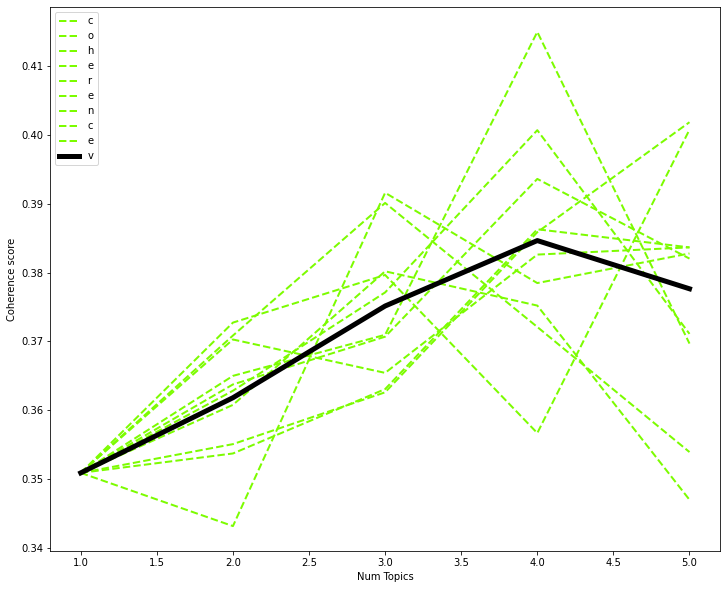

In [ ]:
# Show graph

x = range(start, limit, step)

plt.figure(figsize=(12,10))

for c in coherence_val:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_w, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
for m, cv in zip(x, coherence_w):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.350916
Num Topics = 2  has Coherence Value of 0.361826
Num Topics = 3  has Coherence Value of 0.37514
Num Topics = 4  has Coherence Value of 0.384639
Num Topics = 5  has Coherence Value of 0.37764


In [ ]:
#Num topic menyesuaikan hasil dari nilai coherence paling tinggi
#LDA Model Gensim

from pprint import pprint

num_topics=4
model = LdaModel(corpus=corpus,
                 num_topics=num_topics,
                 id2word=dictionary,
                 per_word_topics=True)

pprint(model.print_topics())

[(0,
  '0.092*"bagus" + 0.078*"iklan" + 0.063*"suka" + 0.049*"baca" + '
  '0.041*"aplikasi" + 0.034*"cerita" + 0.017*"unduh" + 0.012*"ganggu" + '
  '0.012*"tidak" + 0.011*"baru"'),
 (1,
  '0.047*"cerita" + 0.043*"lama" + 0.038*"versi" + 0.026*"baca" + '
  '0.025*"tidak" + 0.023*"masuk" + 0.020*"akun" + 0.016*"nyaman" + '
  '0.016*"jelek" + 0.014*"baru"'),
 (2,
  '0.067*"cerita" + 0.049*"baca" + 0.029*"jaringan" + 0.025*"luar" + '
  '0.024*"bagus" + 0.024*"suka" + 0.018*"versi" + 0.016*"lama" + '
  '0.015*"sekarang" + 0.015*"enak"'),
 (3,
  '0.108*"jaringan" + 0.098*"luar" + 0.081*"cerita" + 0.079*"baca" + '
  '0.025*"bagus" + 0.023*"batas" + 0.020*"aplikasi" + 0.018*"iklan" + '
  '0.018*"kecewa" + 0.017*"baru"')]


In [ ]:
#Num topic menyesuaikan hasil dari nilai coherence paling tinggi
#LDA Model Gensim

from pprint import pprint

num_topics=4
model = LdaModel(corpus=corpus,
                 num_topics=num_topics,
                 id2word=dictionary,
                 per_word_topics=True)

pprint(model.print_topics())

[(0,
  '0.139*"jaringan" + 0.119*"luar" + 0.089*"baca" + 0.039*"cerita" + '
  '0.021*"dalam" + 0.017*"baru" + 0.016*"suka" + 0.015*"iklan" + 0.013*"lama" '
  '+ 0.013*"kecewa"'),
 (1,
  '0.109*"bagus" + 0.063*"iklan" + 0.055*"aplikasi" + 0.048*"cerita" + '
  '0.042*"baca" + 0.029*"suka" + 0.016*"bintang" + 0.015*"ganggu" + '
  '0.014*"unduh" + 0.013*"nyaman"'),
 (2,
  '0.069*"cerita" + 0.048*"suka" + 0.041*"baca" + 0.034*"lama" + 0.029*"versi" '
  '+ 0.026*"masuk" + 0.019*"akun" + 0.015*"hilang" + 0.014*"baru" + '
  '0.013*"hapus"'),
 (3,
  '0.068*"cerita" + 0.049*"baca" + 0.040*"iklan" + 0.036*"jaringan" + '
  '0.029*"luar" + 0.025*"bagus" + 0.024*"batas" + 0.022*"tulis" + '
  '0.019*"versi" + 0.019*"suka"')]


In [ ]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(model,corpus, id2word, mds="mmds", R=30)
lda_display

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.121017 -0.071794       1        1  26.258898
3      0.018293  0.025179       2        1  25.522024
0     -0.023893  0.145258       3        1  24.949899
1     -0.115418 -0.098643       4        1  23.269179, topic_info=         Term         Freq        Total Category  logprob  loglift
26   jaringan  3091.000000  3091.000000  Default  30.0000  30.0000
30       luar  2631.000000  2631.000000  Default  29.0000  29.0000
1       bagus  2387.000000  2387.000000  Default  28.0000  28.0000
74   aplikasi  1212.000000  1212.000000  Default  27.0000  27.0000
25      iklan  1961.000000  1961.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
26   jaringan   124.318544  3091.423985   Topic4  -4.7778  -1.7555
30       luar   111.885256  2631.923526   Topic4  -4.8832  -1.7000
44       eror    72.059656   328.023737   Topic4  -5.3232  -0.0576
11       enak    73.408191   415.863968   Topic4  -5.3047  -0.2763
210      baru    69.181815   770.480397   Topic4  -5.3640  -0.9522

[318 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
197       1  0.022173   acak
197       2  0.886910   acak
197       3  0.066518   acak
793       4  0.981412  akhir
16        1  0.830212   akun
...     ...       ...    ...
1313      2  0.916697    web
594       1  0.094065   wifi
594       2  0.164614   wifi
594       3  0.658458   wifi
594       4  0.070549   wifi

[540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim.prepare(model,corpus, id2word)
print(lda_display)
pyLDAvis.save_html(lda_display, 'lda-gensim5aspek.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.037506  0.123878       1        1  26.268921
3      0.032811 -0.000328       2        1  25.493590
0      0.127103 -0.041948       3        1  24.951687
1     -0.122408 -0.081602       4        1  23.285801, topic_info=         Term         Freq        Total Category  logprob  loglift
26   jaringan  3091.000000  3091.000000  Default  30.0000  30.0000
30       luar  2631.000000  2631.000000  Default  29.0000  29.0000
1       bagus  2388.000000  2388.000000  Default  28.0000  28.0000
74   aplikasi  1213.000000  1213.000000  Default  27.0000  27.0000
25      iklan  1961.000000  1961.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
26   jaringan   124.407350  3091.086666   Topic4  -4.7778  -1.7554
30       luar   111.965180  2631.681833   Topic4  -4.8832  -1.6999
44       eror    72.111131   3

##VSM Using TF

In [ ]:
import taudata as tau
import pandas as pd
from textblob import TextBlob
import nltk
from tqdm import tqdm_notebook as tqdm
nltk.download('popular')

In [ ]:
import pandas as pd
import re
import nltk
import string 
from nltk.tokenize import word_tokenize

nltk.download('punkt')

In [ ]:
df = pd.read_csv("C:/Users/Acer/Wattpad/datawattpad2.csv.", delimiter=',', skiprows=0, low_memory=False)

In [ ]:
df

In [ ]:
data=df.drop(['Date','Data', 'score','aspek', 'kelas'], axis=1)

In [ ]:
data

In [ ]:
data = []
data = df['Data_Cleaned'].values.tolist()
data

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from nltk.tokenize import word_tokenize

In [ ]:
token = []  
for i in data: 
    token.append(word_tokenize(i))

In [ ]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).


bigram = Phrases(token, min_count=5)
trigram = Phrases(bigram[token])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
#Create a Dictionary

token_postag = make_bigrams(token)

dictionary = Dictionary(token_postag)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.75, min_df=5)
document = [' '.join(d) for d in token_postag]
tf = tf_vectorizer.fit_transform(document)
print(tf.shape)
print(tf)

In [ ]:
tf = Tf_vectorizer.fit_transform(data)
tf_term = Tf_vectorizer.get_feature_names()

In [ ]:
n_topics4 = 4
lda4 = LDA(n_components=n_topics4, learning_method='batch', random_state=0).fit(tf)
lda4

In [ ]:
import pickle, TSutantoSMA as ittc

In [ ]:
Top_Words=15
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics4, Top_Words))
ittc.print_Topics(lda4, tf_term, n_topics4, Top_Words)

In [ ]:
lda=[]
for n_topics in tqdm(range(2,9)):
    model = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)
    lda.append(model)

In [ ]:
vsm_topics = []
for i in tqdm(lda) :
    vsm_topics.append(i.transform(tf))

In [ ]:
doc_topic = []
for i in tqdm(range(len(vsm_topics))) :
    doc_topic.append([a.argmax()+1 for a in vsm_topics[i]])

In [ ]:
# menghitung keseimbangan data
import seaborn as sns
import matplotlib.pyplot as plt

for i in doc_topic:
    sns.countplot(i)
    plt.show()

In [ ]:
n_topics = 4
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)

In [ ]:
doc_topic = [a.argmax()+1 for a in tqdm(vsm_topics)]
doc_topic[:10]
sns.countplot(doc_topic)

In [ ]:
import time
import numpy as np
import sklearn
import imblearn

In [ ]:
Top_Words=20
print('Printing top {0} Topics, with tpo {1} Words:'.format(n_topics, Top_Words))
ittc.print_Topics(lda, tf_term, n_topics, Top_Words)